In [107]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [108]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [110]:
score_df = pd.read_csv('final_student_assessment.csv')
score_df

,code_module,code_presentation,id_student,final_result,final_marks
0,AAA,2013J,11391,Pass,82.40
1,AAA,2013J,28400,Pass,65.40
2,AAA,2013J,30268,Withdrawn,0.00
3,AAA,2013J,31604,Pass,76.30
4,AAA,2013J,32885,Pass,55.00
...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.00
32589,GGG,2014J,2645731,Distinction,88.11
32590,GGG,2014J,2648187,Pass,76.67
32591,GGG,2014J,2679821,Withdrawn,91.50


In [111]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data = pd.merge(data, score_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,261,262,263,264,265,266,267,268,269,final_marks
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,82.40
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.40
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,76.30
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.11
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.67
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.50


In [112]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [113]:
def prepare_data(X, rule='W'):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = X[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
    
    # Assessment score data
    score_cols = 'final_marks'
    X3 = X[score_cols]
    X3 = X3.to_numpy().reshape(-1,1)
        
    return X1, X2, X3

In [114]:
# prepare the data
X_train_clicks, X_train_demographics, X_train_score = prepare_data(X_train)
X_test_clicks, X_test_demographics, X_test_score = prepare_data(X_test)

# print stastic
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape, X_train_score.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape, X_test_score.shape)
print('Train target count:', Counter(y_train))
print('Test target count:', Counter(y_test))

Train Data: (26074, 43) (26074, 37) (26074, 1)
Test Data:  (6519, 43) (6519, 37) (6519, 1)
Train target count: Counter({0: 13766, 1: 12308})
Test target count: Counter({0: 3442, 1: 3077})


In [115]:
from tensorflow.keras.layers import Dense, Input, Conv1D, BatchNormalization, AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.activations import sigmoid

# First compare ANN, CNN and LSTM model

In [116]:
# Define ann model
def ann_model():
    ann = Sequential()
    ann.add(Input(shape=(X_train_clicks.shape[1], )))
    ann.add(Dense(128, activation='relu'))
    ann.add(Dense(64, activation='relu'))
    ann.add(Dense(16, activation='relu'))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model():
    cnn = Sequential()
    cnn.add(Input(shape=(X_train_clicks.shape[1], 1)))
    cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(128,  activation='relu'))
    cnn.add(Dense(64,  activation='relu'))
    cnn.add(Dense(32,  activation='relu'))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
    lstm.add(LSTM(10, activation='relu', return_sequences=False))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

In [117]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

# ANN

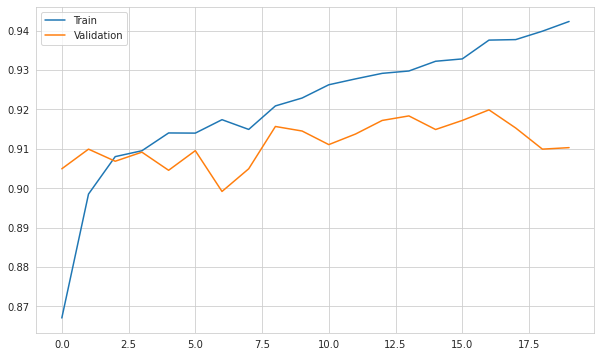

Accuracy:  0.9174720049087284
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3130
           1       0.96      0.87      0.92      3389

    accuracy                           0.92      6519
   macro avg       0.92      0.92      0.92      6519
weighted avg       0.92      0.92      0.92      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN


In [118]:
# model based on only clicks
path = 'model/ann_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

ann = ann_model()
hist1 = ann.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist1)

# predict
ann.load_weights(path)
predict = ann.predict(X_test_clicks)
predict1 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict1, y_test))
print(classification_report(predict1, y_test))

# store in dataframe
result = pd.DataFrame(classification_report(predict1, y_test,output_dict=True)).T
result['accuracy'] = result.loc['accuracy', 'precision']
result = result.iloc[:2, [0,1,2,4]]
result['model'] = 'ANN'
result

# CNN

In [119]:
# Convert the data into 3-dimensional
X_train_clicks_2 = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
X_test_clicks_2 = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)

# convert data into 3-d
X_train_demographics_2 = X_train_demographics.to_numpy().reshape(X_train_demographics.shape[0], X_train_demographics.shape[1], 1)
X_test_demographics_2 = X_test_demographics.to_numpy().reshape(X_test_demographics.shape[0], X_test_demographics.shape[1], 1)

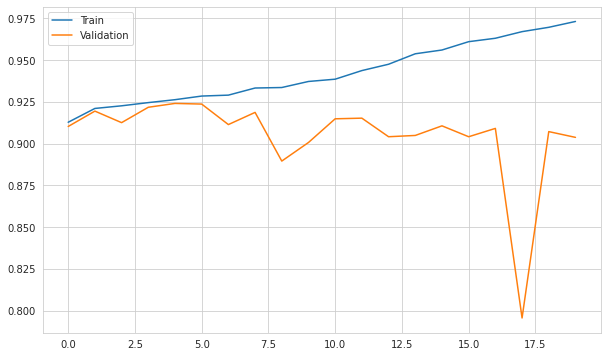

Accuracy:  0.925755483969934
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3082
           1       0.98      0.88      0.93      3437

    accuracy                           0.93      6519
   macro avg       0.93      0.93      0.93      6519
weighted avg       0.93      0.93      0.93      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN


In [120]:
# model based on only clicks
path = 'model/cnn_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

cnn = cnn_model()
hist2 = cnn.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist2)

# predict
cnn.load_weights(path)
predict= cnn.predict(X_test_clicks_2)
predict2 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict2, y_test))
print(classification_report(predict2, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict2, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN'

result = pd.concat([result, r])
result

# LSTM

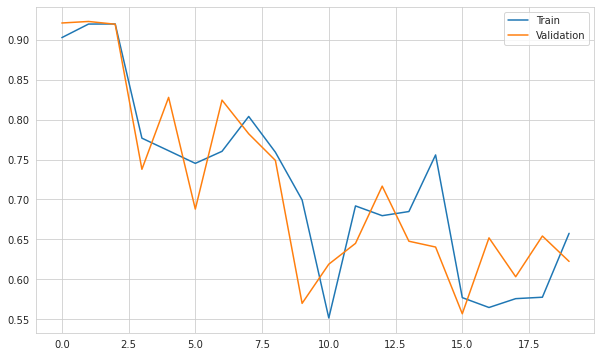

Accuracy:  0.9233011198036508
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      3088
           1       0.98      0.88      0.92      3431

    accuracy                           0.92      6519
   macro avg       0.93      0.93      0.92      6519
weighted avg       0.93      0.92      0.92      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM


In [121]:
# model based on only clicks
path = 'model/lstm_model.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

lstm = lstm_model()
hist3 = lstm.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist3)

# predict
lstm.load_weights(path)
predict = lstm.predict(X_test_clicks_2)
predict3 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict3, y_test))
print(classification_report(predict3, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict3, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'LSTM'

result = pd.concat([result, r])
result

Text(0, 0.5, 'Training Accuracy')

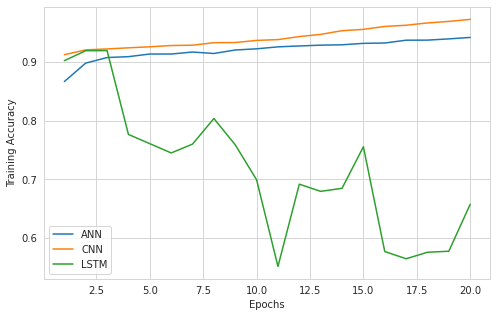

In [122]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist1.history['accuracy'], label='ANN')
plt.plot(epochs, hist2.history['accuracy'], label='CNN')
plt.plot(epochs, hist3.history['accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Validation Accuracy')

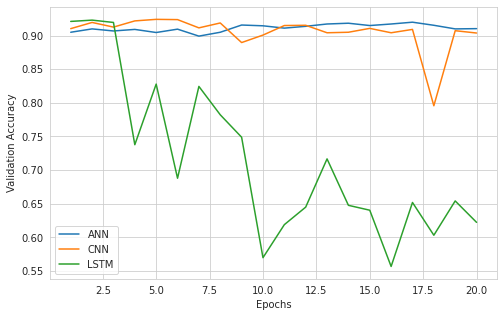

In [123]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist1.history['val_accuracy'], label='ANN')
plt.plot(epochs, hist2.history['val_accuracy'], label='CNN')
plt.plot(epochs, hist3.history['val_accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')

# Demographics model

In [124]:
# Define ann model
def ann_model_demo():
    ann = Sequential()
    ann.add(Input(shape=(X_train_demographics.shape[1], )))
    ann.add(Dense(64, activation='relu'))
    ann.add(Dense(16, activation='relu'))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann

# define cnn model
def cnn_model_demo():
    cnn = Sequential()
    cnn.add(Input(shape=(X_train_demographics.shape[1], 1)))
    cnn.add(Conv1D(16, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(32, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(64,  activation='relu'))
    cnn.add(Dense(32,  activation='relu'))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn

# define lstm model
def lstm_model_demo():
    lstm = Sequential()
    lstm.add(Input(shape=(X_train_demographics.shape[1], 1)))
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
    lstm.add(LSTM(10, activation='relu', return_sequences=False))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

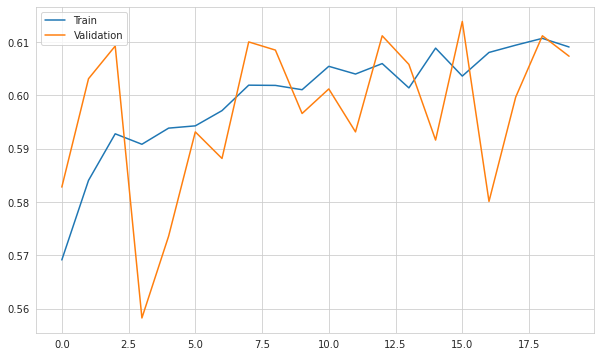

Accuracy:  0.6191133609449302
              precision    recall  f1-score   support

           0       0.72      0.62      0.67      3991
           1       0.51      0.62      0.56      2528

    accuracy                           0.62      6519
   macro avg       0.61      0.62      0.61      6519
weighted avg       0.64      0.62      0.62      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM
0,0.719059,0.620145,0.665949,0.619113,ANN_DM
1,0.507312,0.617484,0.557003,0.619113,ANN_DM


In [125]:
# model based on only demographics
path = 'model/ann_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

ann = ann_model_demo()
hist4 = ann.fit(X_train_demographics, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist4)

# predict
ann.load_weights(path)
predict = ann.predict(X_test_demographics)
predict4 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict4, y_test))
print(classification_report(predict4, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict4, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'ANN_DM'

result = pd.concat([result, r])
result

# CNN

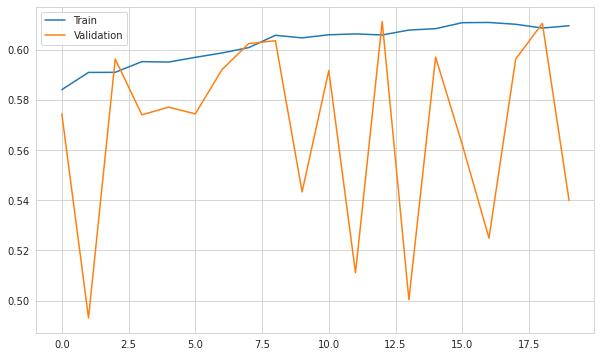

Accuracy:  0.6157386102162908
              precision    recall  f1-score   support

           0       0.65      0.63      0.64      3543
           1       0.58      0.60      0.59      2976

    accuracy                           0.62      6519
   macro avg       0.61      0.61      0.61      6519
weighted avg       0.62      0.62      0.62      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM
0,0.719059,0.620145,0.665949,0.619113,ANN_DM
1,0.507312,0.617484,0.557003,0.619113,ANN_DM
0,0.650784,0.632233,0.641374,0.615739,CNN_DM
1,0.576536,0.596102,0.586156,0.615739,CNN_DM


In [126]:
# model based on only demographics
path = 'model/cnn_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

cnn = cnn_model_demo()
hist5 = cnn.fit(X_train_demographics_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist5)

# predict
cnn.load_weights(path)
predict= cnn.predict(X_test_demographics_2)
predict5 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict5, y_test))
print(classification_report(predict5, y_test))

# store classification result
r = pd.DataFrame(classification_report(predict5, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN_DM'

result = pd.concat([result, r])
result

# LSTM

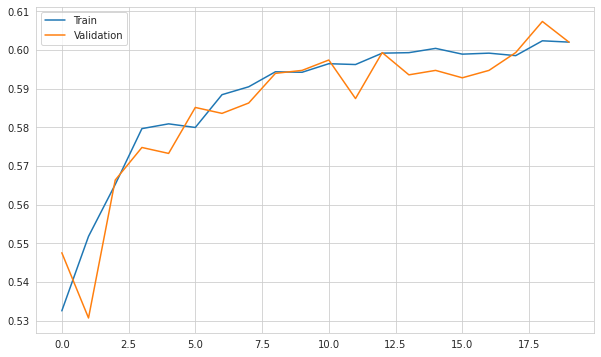

Accuracy:  0.618192974382574
              precision    recall  f1-score   support

           0       0.69      0.63      0.66      3793
           1       0.54      0.61      0.57      2726

    accuracy                           0.62      6519
   macro avg       0.61      0.62      0.61      6519
weighted avg       0.63      0.62      0.62      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM
0,0.719059,0.620145,0.665949,0.619113,ANN_DM
1,0.507312,0.617484,0.557003,0.619113,ANN_DM
0,0.650784,0.632233,0.641374,0.615739,CNN_DM
1,0.576536,0.596102,0.586156,0.615739,CNN_DM


In [127]:
# model based on only demographics
path = 'model/lstm_model_demo.h5'
callback = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

lstm = lstm_model_demo()
hist6 = lstm.fit(X_train_demographics_2, y_train, validation_split=0.1, epochs=20, batch_size=30, verbose=0, callbacks=[callback])
visualize_loss(hist6)

# predict
lstm.load_weights(path)
predict = lstm.predict(X_test_demographics_2)
predict6 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict6, y_test))
print(classification_report(predict6, y_test))

# store and concat with result
r = pd.DataFrame(classification_report(predict6, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'LSTM_DM'

result = pd.concat([result, r])
result

Text(0.5, 1.0, 'Demographics')

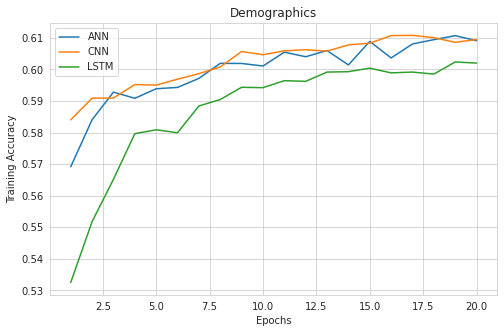

In [128]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist4.history['accuracy'], label='ANN')
plt.plot(epochs, hist5.history['accuracy'], label='CNN')
plt.plot(epochs, hist6.history['accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Demographics')

Text(0.5, 1.0, 'Demographics')

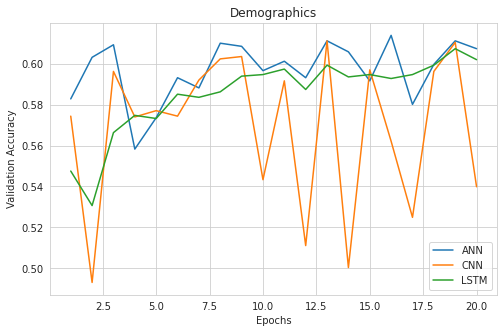

In [129]:
sns.set_style('whitegrid')
epochs = list(range(1, 21))
plt.figure(figsize=(8, 5))
plt.plot(epochs, hist4.history['val_accuracy'], label='ANN')
plt.plot(epochs, hist5.history['val_accuracy'], label='CNN')
plt.plot(epochs, hist6.history['val_accuracy'], label='LSTM')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Demographics')

<br> <br>
# combine clicks and demographics
<br> <br>

In [130]:
# Define model
def define_combine_model():
    input1 = Input(shape=(X_train_clicks.shape[1], 1))
    x1 = Conv1D(32, kernel_size=2, activation='relu')(input1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Conv1D(64, kernel_size=2, activation='relu')(x1)
    x1 = BatchNormalization()(x1)
    x1 = AveragePooling1D(2)(x1)
    x1 = Flatten()(x1)
    x1 = Dense(128,  activation='relu')(x1)
    x1 = Dense(64,  activation='relu')(x1)
    x1 = Dense(32,  activation='relu')(x1)
    x1 = Dense(1,  activation='relu')(x1)

    input2 = Input(shape=(X_train_demographics.shape[1], 1))
    x2 = Conv1D(16, kernel_size=2, activation='relu')(input2)
    x2 = BatchNormalization()(x2)
    x2 = AveragePooling1D(2)(x2)
    x2 = Conv1D(32, kernel_size=2, activation='relu')(x2)
    x2 = BatchNormalization()(x2)
    x2 = AveragePooling1D(2)(x2)
    x2 = Flatten()(x2)
    x2 = Dense(64,  activation='relu')(x2)
    x2 = Dense(32,  activation='relu')(x2)
    x2 = Dense(1,  activation='relu')(x2)



    out1 = Add()([x1, x2])
#     out = Dense(1, activation='sigmoid')(out1)
    out = sigmoid(out1)

    combine_model = Model(inputs=[input1, input2], outputs=out)

    combine_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return combine_model

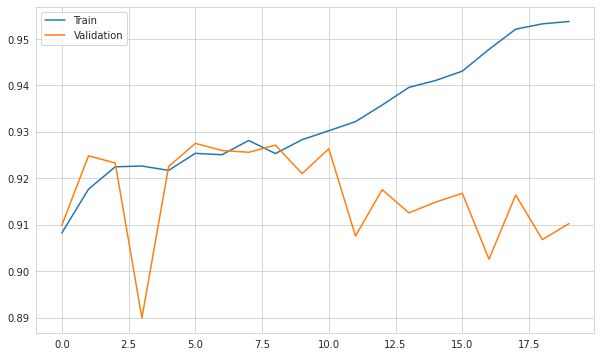


Accuracy:  0.9108759012118423
              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3363
           1       0.92      0.90      0.91      3156

    accuracy                           0.91      6519
   macro avg       0.91      0.91      0.91      6519
weighted avg       0.91      0.91      0.91      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM
0,0.719059,0.620145,0.665949,0.619113,ANN_DM
1,0.507312,0.617484,0.557003,0.619113,ANN_DM
0,0.650784,0.632233,0.641374,0.615739,CNN_DM
1,0.576536,0.596102,0.586156,0.615739,CNN_DM


In [131]:
# model check point
path = 'model/combine_model.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model()
hist7 = combine_model.fit([X_train_clicks_2, X_train_demographics_2], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
visualize_loss(hist7)

predict = combine_model.predict([X_test_clicks_2, X_test_demographics_2])
predict7 = np.where(predict>0.5, 1, 0)
print()
print('Accuracy: ', accuracy_score(predict7, y_test))
print(classification_report(predict7, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict7, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN_CM'

result = pd.concat([result, r])
result

# this dataset is imbalance dataset, so lets compute the class weight and assign it to the model

In [132]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.947043440360308, 1: 1.0592297692557686}

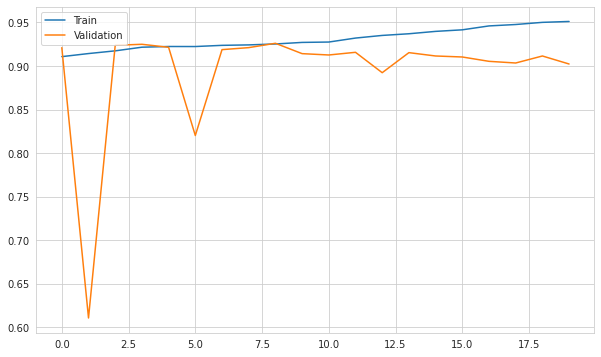

Accuracy:  0.9033594109526001
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3194
           1       0.94      0.87      0.90      3325

    accuracy                           0.90      6519
   macro avg       0.91      0.90      0.90      6519
weighted avg       0.91      0.90      0.90      6519



,precision,recall,f1-score,accuracy,model
0,0.876525,0.963898,0.918138,0.917472,ANN
1,0.963276,0.874594,0.916796,0.917472,ANN
0,0.877397,0.979883,0.925812,0.925755,CNN
1,0.979851,0.877219,0.925698,0.925755,CNN
0,0.875944,0.976360,0.923430,0.923301,LSTM
1,0.976276,0.875546,0.923171,0.923301,LSTM
0,0.719059,0.620145,0.665949,0.619113,ANN_DM
1,0.507312,0.617484,0.557003,0.619113,ANN_DM
0,0.650784,0.632233,0.641374,0.615739,CNN_DM
1,0.576536,0.596102,0.586156,0.615739,CNN_DM


In [133]:
# model check point
path = 'model/combine_model_class_weight.h5'
callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

combine_model = define_combine_model()
hist8 = combine_model.fit([X_train_clicks_2, X_train_demographics_2], y_train,
                         validation_split=0.1, epochs=20, batch_size=32, verbose=0, 
                          callbacks=[callbacks], class_weight=class_weights)
visualize_loss(hist8)

predict = combine_model.predict([X_test_clicks_2, X_test_demographics_2])
predict8 = np.where(predict>0.5, 1, 0)
print('Accuracy: ', accuracy_score(predict8, y_test))
print(classification_report(predict8, y_test))

# store in dataframe
r = pd.DataFrame(classification_report(predict8, y_test,output_dict=True)).T
r['accuracy'] = r.loc['accuracy', 'precision']
r = r.iloc[:2, [0,1,2,4]]
r['model'] = 'CNN_CW'

result = pd.concat([result, r])
result